In [8]:
import pandas as pd
import numpy as np
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score
from scipy.stats import entropy as scipy_entropy
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.optimize import linear_sum_assignment as linear_assignment
import time

In [9]:
# Load the "banana" dataset
banana_data = pd.read_csv('D:\\TEST3\\banana.csv')

In [10]:
# Extract features and class labels
X_banana = banana_data.drop('class', axis=1)
y_banana = banana_data['class']

In [11]:
# 開始計時
start_time = time.time()

In [12]:
# 執行階層式分群
hc = AgglomerativeClustering(n_clusters=2, affinity='euclidean', linkage='ward')
hc_labels = hc.fit_predict(banana_data[['x', 'y']])
# 使用 linkage 創建群聚鏈接
linked = linkage(banana_data[['x', 'y']], 'ward')

c:\Users\brain\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\cluster\_agglomerative.py:1006: FutureWarning: Attribute `affinity` was deprecated in version 1.2 and will be removed in 1.4. Use `metric` instead
  warnings.warn(


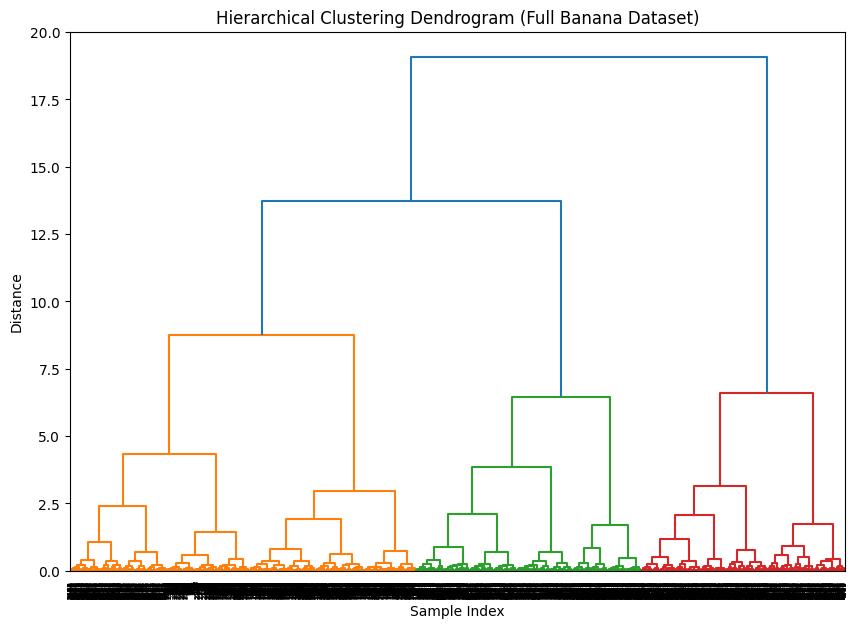

In [13]:
# 繪製樹狀圖
plt.figure(figsize=(10, 7))
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Hierarchical Clustering Dendrogram (Full Banana Dataset)')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

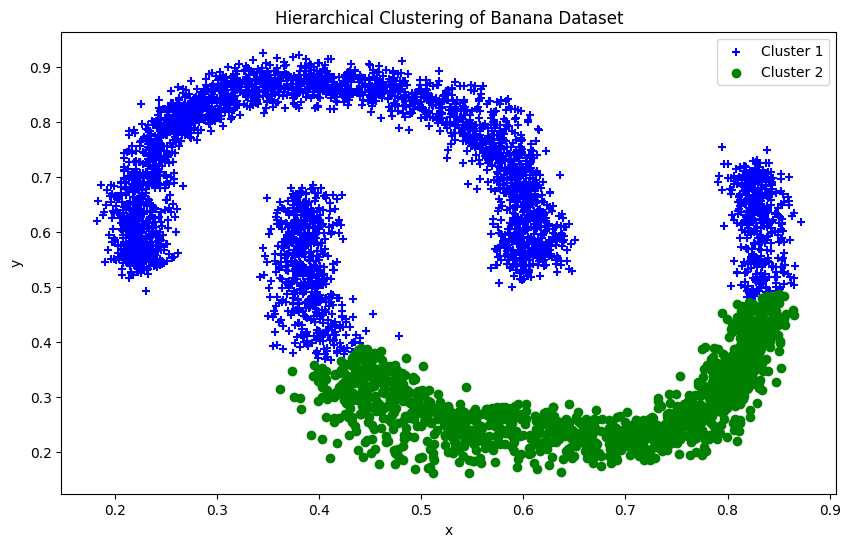

In [14]:
# 繪製分群結果
plt.figure(figsize=(10, 6))
plt.scatter(banana_data['x'][hc_labels == 0], banana_data['y'][hc_labels == 0], c='blue', marker='+', label='Cluster 1')
plt.scatter(banana_data['x'][hc_labels == 1], banana_data['y'][hc_labels == 1], c='green', marker='o', label='Cluster 2')
plt.title('Hierarchical Clustering of Banana Dataset')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [15]:
# 計算 SSE
centroids = [banana_data[hc_labels == i][['x', 'y']].mean(axis=0) for i in range(hc.n_clusters)]
sse_total = sum(np.sum(np.linalg.norm(banana_data[hc_labels == i][['x', 'y']] - centroids[i][['x', 'y']], axis=1)**2) for i in range(hc.n_clusters))

# 計算 ARI (Adjusted Rand Index)
ari = adjusted_rand_score(banana_data['class'], hc_labels)

# 計算每個群的熵，然後計算其平均值
cluster_entropy = [scipy_entropy(banana_data[hc_labels == i]['class'].value_counts(normalize=True)) for i in range(hc.n_clusters)]
mean_entropy = np.mean(cluster_entropy)

In [16]:
def calculate_accuracy(true_labels, predicted_labels):
    D = max(predicted_labels.max(), true_labels.max()) + 1
    w = np.zeros((D, D), dtype=np.int64)
    for i in range(predicted_labels.size):
        w[predicted_labels[i], true_labels[i]] += 1
    ind = linear_assignment(w.max() - w)
    return sum([w[i, j] for i, j in zip(*ind)]) / predicted_labels.size
accuracy = calculate_accuracy(banana_data['class'], hc_labels)

# 停止計時
end_time = time.time()

In [17]:
# 輸出結果
print("Total SSE: ", sse_total)
print("ARI: ", ari)
print("Mean Entropy: ", mean_entropy)
print("Accuracy: ", accuracy)
print("Elapsed Time: {:.2f} seconds".format(end_time - start_time))

Total SSE:  222.58980337285567
ARI:  0.32794885780077365
Mean Entropy:  0.30086985094609886
Accuracy:  0.7865308667636666
Elapsed Time: 44.58 seconds
